In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris


In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data 
target = iris.target 
names = iris.target_names


df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Comparison between various species based on sepal length and width using respective visualization 

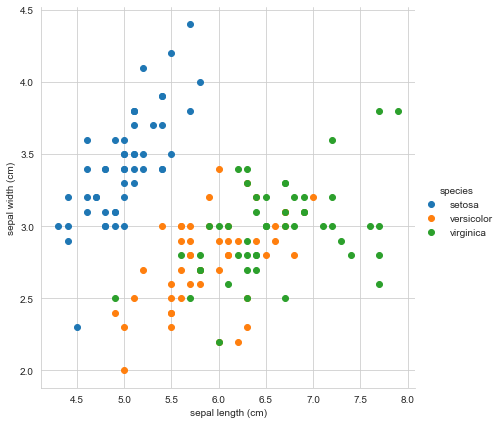

In [38]:
import seaborn as sns

sns.set_style("whitegrid")
 
sns.FacetGrid(df, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal length (cm)',
                              'sepal width (cm)').add_legend()

### Perform the Bi-variate Analysis via pairplot visualization

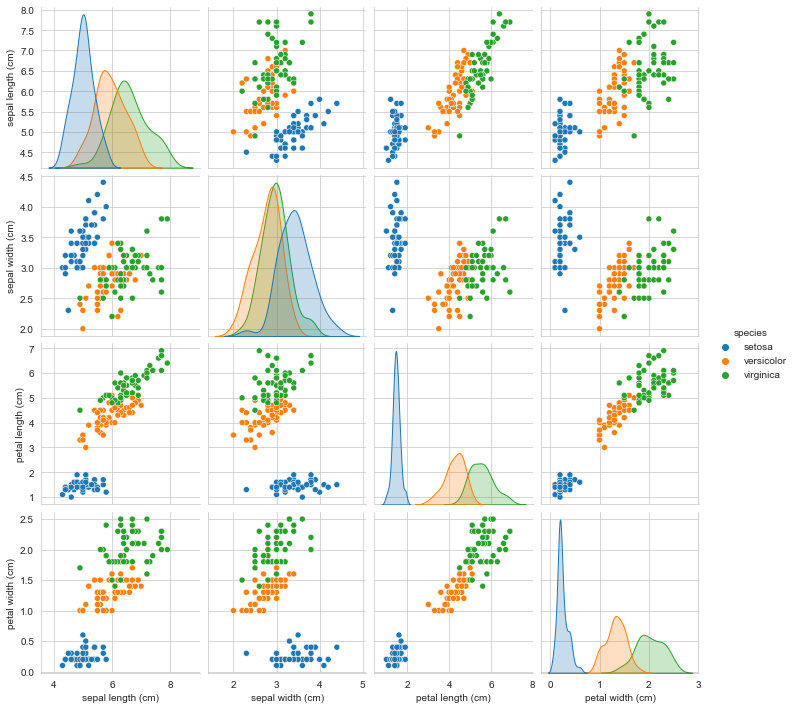

In [40]:
sns.pairplot(df,hue ="species")

### Justify Sepal Length and Sepal Width features are slightly correlated with each other



In [43]:
df['sepal length (cm)'].corr(df['sepal width (cm)'])

-0.11756978413300208

Very weak negative correlation.

### Visualize the categorical feature “Species” with all other four input variables

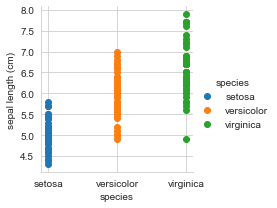

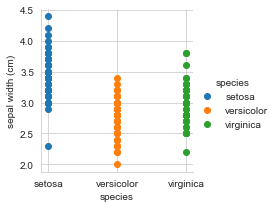

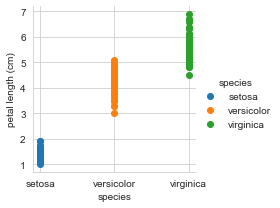

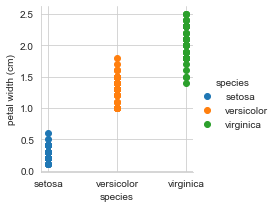

In [61]:
import seaborn as sns

for i in df.columns:
#     print (i)
    if(i=='species'):
        break


    sns.set_style("whitegrid")

    sns.FacetGrid(df, hue ="species").map(plt.scatter,'species',i).add_legend()

### Plot the density of the length and width in the species.

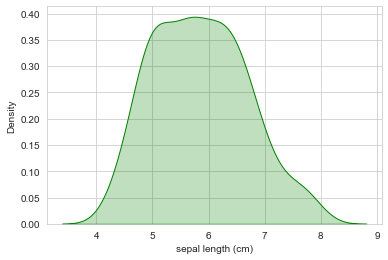

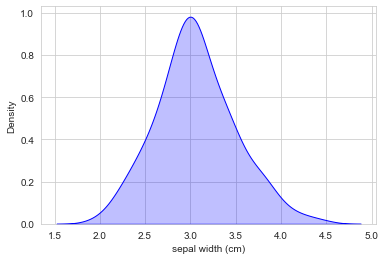

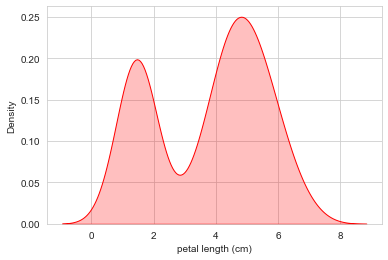

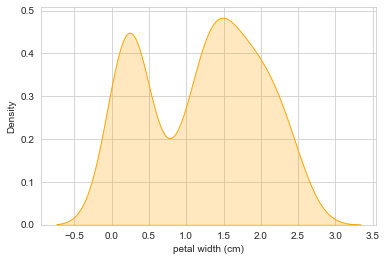

In [60]:
color = ['green','blue','red','orange']
x=0
for i in df.columns:
    if(i=='species'):
        break
    sns.kdeplot(df[i],shade=True,color=color[x])
    x+=1
    plt.show()

###  Plot the probability density function(PDF) with each feature as a variable on X-axis and it’s histogram and corresponding kernel density plot on Y-axis.


blue
red
orange


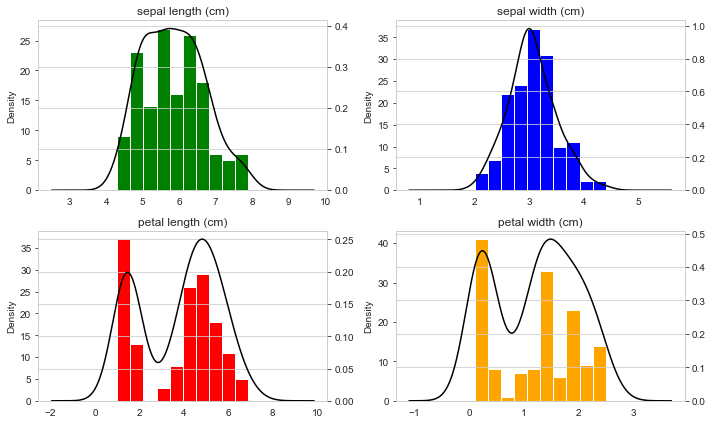

In [79]:
import matplotlib.pyplot as plt


k = len(df.columns)
n = 2
m = (k - 1) // n
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
color = ['green','blue','red','orange']
x=0
for i, (name, col) in enumerate(df.iteritems()):
    try:
        r, c = i // n, i % n
        ax = axes[r, c]
        col.hist(ax=ax,color=color[x])
        ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name,color='black')
        ax2.set_ylim(0)
        x+=1
#         print(color[x])
    except:
        pass

fig.tight_layout()